# Loading the run history

In [1]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel'); sns.set_style("ticks")

In [2]:
wandb_api = wandb.Api()
run = wandb_api.run(f"6759-proj/Train-Glow-2mTemp/3fh4tzm4")

In [3]:
history = run.history()

In [4]:
history.columns

Index(['_step', '_runtime', 'train_g_obj', '_timestamp', 'train_gx_loss',
       'train_gy_loss', 'train_nll_x', 'train_nll_y', 'train_dx_loss',
       'train_dy_loss', 'train_gx_aux', 'train_gy_aux', 'eval_nll_x',
       'eval_nll_y', 'eval_gx_loss', 'eval_gy_loss', 'eval_dx_loss',
       'eval_dy_loss', 'eval_gx_aux', 'eval_gy_aux', 'txx_bias_mean',
       'txx_bias_std', 'txn_bias_mean', 'txn_bias_std'],
      dtype='object')

In [5]:
metrics = ['train_g_obj', 'train_gx_loss',
       'train_gy_loss', 'train_nll_x', 'train_nll_y', 'train_dx_loss',
       'train_dy_loss', 'train_gx_aux', 'train_gy_aux', 'eval_nll_x',
       'eval_nll_y', 'eval_gx_loss', 'eval_gy_loss', 'eval_dx_loss',
       'eval_dy_loss', 'eval_gx_aux', 'eval_gy_aux', 'txx_bias_mean',
       'txx_bias_std', 'txn_bias_mean', 'txn_bias_std']
       
# making sure the logging went well for all metrics
for metric in metrics:
    print(len(history[metric].dropna()))
epochs = range(len(history[metrics[0]].dropna()))
epochs

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


range(0, 20)

# Making the figures

## Global training objective
See AlignFlow or ClimAlign for the mathematical definition. This objective is minimized w.r.t. the generators and maximized w.r.t. the critics (or discriminators).

The first drop indicates than the samples generated by the generators is starting to match the target distribution . However, the critics have a much easier job than the generators. This can explain why, upon further training, the global objective starts to increase. This doesn't mean that the generated samples are becoming worse, just that the critics are better at dicerning the generated ones from the real ones.

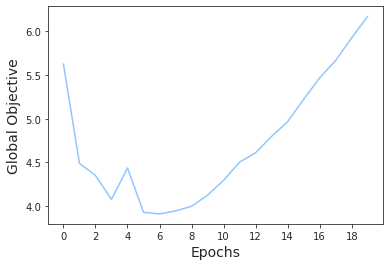

In [6]:
# global objective
fig = plt.figure()
plt.plot(epochs, history['train_g_obj'].dropna())
plt.ylabel('Global Objective', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.xticks(epochs[::2])
plt.savefig('figures/glob_obj.png')

## Generator training losses
Here we can see one loss for the generator of each resolution. The Downscaled generator loss decreases nicely during training which means that it is learning to fool the high resolution critic and thus produce samples matching the target distribution. To understand why the Global generator struggles to do as much, it's important to remember that our Global samples actually have the same number of spatial points as the high resolution, but 4x4 blobs of them share the exact same value. So if the generator struggles to reproduce this pattern, the critic's job becomes very easy.

(Is it pertinent to include the low resolution generator/critic in the report?)

Also, there is a clear sign of overfitting by the generator which is usual in adversarial training.

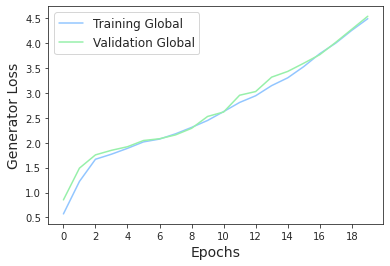

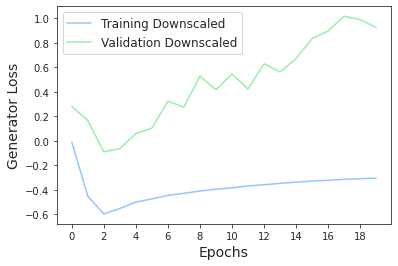

In [7]:
fig = plt.figure()
plt.plot(epochs, history['train_gx_loss'].dropna(), label='Training Global')
plt.plot(epochs, history['eval_gx_loss'].dropna(), label='Validation Global')
plt.ylabel('Generator Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.xticks(epochs[::2])
plt.legend(fontsize=12)
plt.savefig('figures/gx_loss.png')

fig = plt.figure()
plt.plot(epochs, history['train_gy_loss'].dropna(), label='Training Downscaled')
plt.plot(epochs, history['eval_gy_loss'].dropna(), label='Validation Downscaled')
plt.ylabel('Generator Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.xticks(epochs[::2])
plt.legend(fontsize=12)
plt.savefig('figures/gy_loss.png')

## Negative log likelihood loss (generators')
This is more or less self explanatory: the lower it gets, the better the generated samples match the target distribution (either low or high resolution)

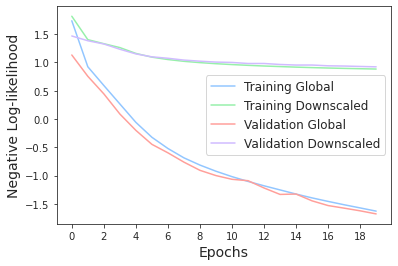

In [8]:
fig = plt.figure()
plt.plot(epochs, history['train_nll_x'].dropna(), label='Training Global')
plt.plot(epochs, history['train_nll_y'].dropna(), label='Training Downscaled')
plt.plot(epochs, history['eval_nll_x'].dropna(), label='Validation Global')
plt.plot(epochs, history['eval_nll_y'].dropna(), label='Validation Downscaled')
plt.ylabel('Negative Log-likelihood', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.xticks(epochs[::2])
plt.legend(fontsize=12)
plt.savefig('figures/nll_loss.png')

## Critics loss


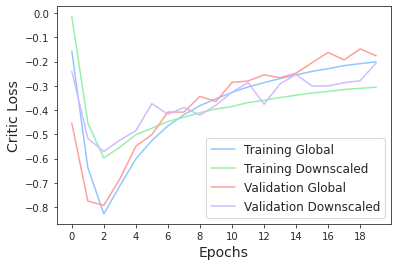

In [9]:
fig = plt.figure()
plt.plot(epochs, history['train_dx_loss'].dropna(), label='Training Global')
plt.plot(epochs, history['train_dy_loss'].dropna(), label='Training Downscaled')
plt.plot(epochs, history['eval_dx_loss'].dropna(), label='Validation Global')
plt.plot(epochs, history['eval_dy_loss'].dropna(), label='Validation Downscaled')
plt.ylabel('Critic Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.xticks(epochs[::2])
plt.legend(fontsize=12)
plt.savefig('figures/d_loss.png')

## Generator's auxiliary loss
The auxiliary loss is spatial MAE (Mean Absolute Error)
This doesn't say much since we don't have it for training.

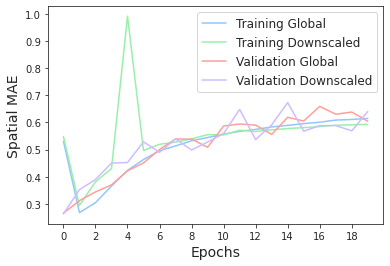

In [10]:
fig = plt.figure()
plt.plot(epochs, history['train_gx_aux'].dropna(), label='Training Global')
plt.plot(epochs, history['train_gy_aux'].dropna(), label='Training Downscaled')
plt.plot(epochs, history['eval_gx_aux'].dropna(), label='Validation Global')
plt.plot(epochs, history['eval_gy_aux'].dropna(), label='Validation Downscaled')
plt.ylabel('Spatial MAE', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.xticks(epochs[::2])
plt.legend(fontsize=12)
plt.savefig('figures/g_aux.png')

## Climdex

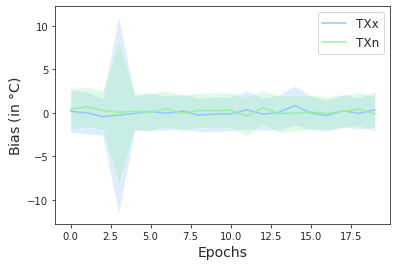

In [11]:
fig = plt.figure()
plt.plot(epochs, history['txx_bias_mean'].dropna(), label='TXx')
plt.fill_between(epochs, history['txx_bias_mean'].dropna().to_numpy() - history['txx_bias_std'].dropna().to_numpy(),
                         history['txx_bias_mean'].dropna().to_numpy() + history['txx_bias_std'].dropna().to_numpy(),
                         alpha=0.3)
plt.plot(epochs, history['txn_bias_mean'].dropna(), label='TXn')
plt.fill_between(epochs, history['txn_bias_mean'].dropna().to_numpy() - history['txn_bias_std'].dropna().to_numpy(),
                         history['txn_bias_mean'].dropna().to_numpy() + history['txn_bias_std'].dropna().to_numpy(),
                         alpha=0.3)
plt.ylabel(r'Bias (in $\degree$C)', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('figures/Climdex_txx_txn.png')